## Расчётная работа по Теории Вероятности. Вариант 19<p>Задание 1</p>

### Импорт библиотек
- NumPy - библиотека для работы с массивами, матрицами. Предоставляет статистические функции.
- SciPy - библиотека предоставляет статистические функции и поддерживает построение графиков.
- scipy.integrate для интегрирования
- scipy.stats.norm для анализа нормального распредления
- scipy.optimize.norm для оптимизации функции (минимизации)
- MatPlotLib - это пакет для визуализации данных (для построения графиков).
- Regex(re) - поддерживает использование регулярных выражений.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import re

from scipy import stats
from scipy import optimize

### Константы
n = 450 - объём выборки
</br>$a_X$ = 2.35 - математическое ожидание
</br>$\sigma^2_X$ = 6.4 - дисперсия
</br>$\gamma$ = 0.95 - доверительная вероятность
</br>$\alpha$ = 0.005 - уровень значимости

In [2]:
n = 450
MX = 2.35
DX = 6.4
S = np.sqrt(DX) # Среднее квадратичное отклонение
SEED = 0        # Начальное значение для получения предсказуемой последовательности случайных чисел

$f(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-a)^{2}}{2\sigma^{2}}}$ - Функция нормального распределения случайной величины (1)</br></br>
Сгенерируем выборку и выведем первые 10 значений случайной величины:

In [3]:
x: np.ndarray = stats.norm.rvs(loc=MX, scale=S, size=n, random_state=SEED)
print(f"{str(x[:10])[1:-1]}...")

 6.81273866  3.36232656  4.82603301  8.0190612   7.07458953 -0.12233921
  4.7535547   1.96709319  2.08887466  3.38874118...


### 1.1 Построить гистограмму распределения</br> и изобразить её графически одновременно с теоретической плотностью вероятностей.

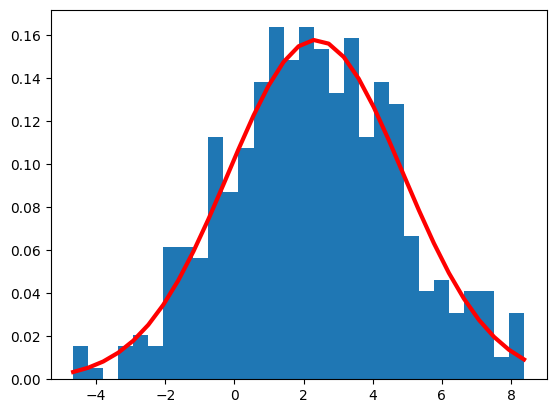

In [4]:
_, intervals_x, _ = plt.hist(x, 30, density=True) # Построение гистограммы по имеющимся значениям X 

theoretic_y = 1 / (S * np.sqrt(2 * np.pi)) * np.exp(- (intervals_x - MX)**2 / (2 * S**2)) # Вычисление функции нормального распределения по формуле (1)

plt.plot(intervals_x, theoretic_y, linewidth=3, color='r')
plt.show()

### 1.2 Вычислить выборочное среднее и выборочную дисперсию</br>
Выборочное среднее: 
$\bar{x} = \frac{1}{n}\sum_{i=0}^{n-1}x_{i}$

In [5]:
average = x.sum() / n

Выборочная дисперсия: $S^2 = \frac{1}{n}\sum_{i=0}^{n-1}(x_{i}-\bar{x})^2$

In [6]:
sumT = 0
for i in range(n):
    sumT += (x[i] - average) ** 2

print(f"Выборочное среднее: {average}\nВыборочная дисперсия: {sumT / n}")

Выборочное среднее: 2.2773128574414394
Выборочная дисперсия: 6.160497636072116


### 1.3 Найти оценки математического ожидания и дисперсии </br>методом максимального правдоподобия. Указать несмещённую оценку дисперсии.

Функция правдоподобия: $L(x_1,...,x_n; \theta) = f(x_1; \theta) * ... * f(x_n; \theta)$ </br>
Оценка максимального правдоподобия: $L(x_1,...,x_n;\hat{\theta}) = maxL(x_1,...,x_n; \theta)$ </br></br>
Для мат.ожидания:

In [7]:
def plausibility(x, params):
    return stats.norm.logpdf(x, loc=params[0], scale=params[1]).sum()

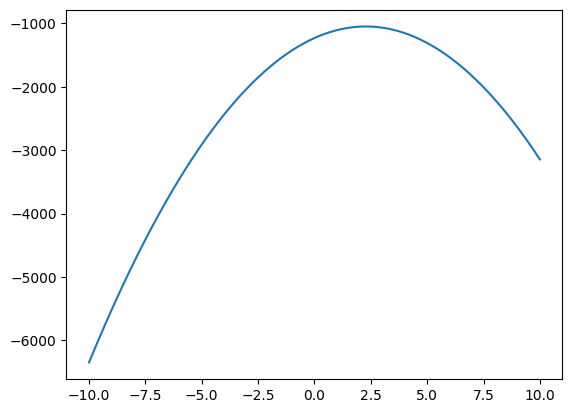

In [8]:
x_axis = np.linspace(-10, 10, 1000)
y_axis = [plausibility(x, [val, S]) for val in np.linspace(-10, 10, 1000)]
plt.plot(x_axis, y_axis)
plt.show()

Для дисперсии:

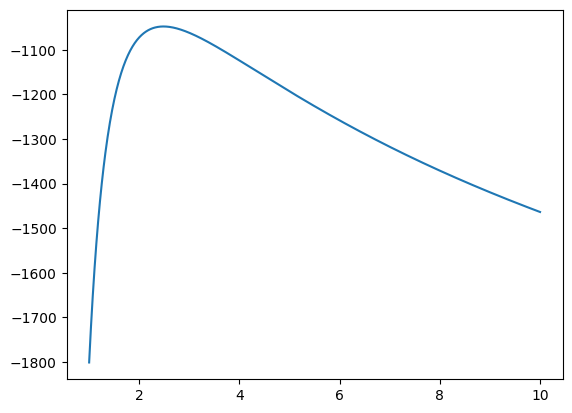

In [9]:
x_axis = np.linspace(1, 10, 1000)
y_axis = [plausibility(x, [MX, val]) for val in np.linspace(1, 10, 1000)]
plt.plot(x_axis, y_axis)
plt.show()

Инверсируем функции для нахождения минимального значения с помощью функции минимизации

In [10]:
def negative_MX(MX):
    return -1 * plausibility(x,[MX, S])

def negative_S(S):
    return -1 * plausibility(x, [MX, S])

Найдём оценки мат. ожидания и дисперсии:

In [11]:
est_MX = optimize.minimize(negative_MX, 10).x
est_S = optimize.minimize(negative_S, 1).x
print(f"Оценка мат. ожидания: {str(est_MX)[1:-1]}\nОценка дисперсии: {str(est_S ** 2)[1:-1]}")

Оценка мат. ожидания: 2.27731281
Оценка дисперсии: 6.16578113


Несмещённая оценка дисперсии: $S'^{2}=\frac{1}{n-1}\sum^{n}_{i=1}(X_i-\bar{X})^2=\frac{n}{n-1}S^2$</br>
Где $S^2$ - выборочная дисперсия

In [12]:
unb_est = (n * sumT / n) / (n - 1)
print(f"Несмещенная оценка дисперсии: {unb_est}")

Несмещенная оценка дисперсии: 6.174218120784971


### 1.4 Построить доверительные интервалы для математического ожидания и дисперсии,</br> соответствующие доверительной вероятности и $\gamma$</br>
### 1) Интервальная оценка MX при известной DX:</br> $\Delta_{\gamma}(\theta)=(\bar{X}-c_{(1+\gamma)/2}\frac{\sigma}{\sqrt{n}},\bar{X}+c_{(1+\gamma)/2}\frac{\sigma}{\sqrt{n}})$</br></br>
$c_{(1+\gamma)/2}$ - такое значение функции Лапласа $Ф(x)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{x}e^{-u^2/2}du$,</br> при котором $Ф(c_{(1+\gamma)/2})=(1+\gamma)/2$<br/></br>$c_{(1+\gamma)/2}$ найти из таблицы</br></br>
$Ф(c_{(1+\gamma)/2})=0.975$</br>
$c_{(1+\gamma)/2}=1.960$</br></br>


In [13]:
MX1 = average - 1.960 * (S / np.sqrt(n)), average + 1.960 * (S / np.sqrt(n))

print(f"Интервальная оценка MX при известной DX: {MX1}")

Интервальная оценка MX при известной DX: (2.0435692181934613, 2.5110564966894175)


### 2) Интервальная оценка MX при неизвестной DX:
$\displaystyle
\Delta_{\gamma}(\theta)=\Big( \bar{X} - t_{(1+\gamma)/2;n-1} \frac S{\sqrt{n-1}};
\quad \bar{X} + t_{(1+\gamma)/2;n-1} \frac S{\sqrt{n-1}} \Big)$

$t_{(1+\gamma)/2;n-1}$ - квантиль распределения Стьюдента</br></br>
Так как $n \ge 30$, то $t_{(1+\gamma)/2;n-1} \approx c_{(1+\gamma)/2}$</br></br>
$\displaystyle\Delta_{\gamma}(\theta)=\Big( \bar{X} - c_{(1+\gamma)/2} \frac S{\sqrt{n-1}};
\quad \bar{X} + c_{(1+\gamma)/2} \frac S{\sqrt{n-1}} \Big)$</br></br>
S = $\sqrt{S^2}$, где $S^2$ - выборочная дисперсия

In [14]:
MX2 = (average - 1.960 * (np.sqrt(sumT / n) / np.sqrt(n - 1)), average + 1.960 * (np.sqrt(sumT / n) / np.sqrt(n - 1)))
print(f"Интервальная оценка MX при неизвестной DX: {MX2}")

Интервальная оценка MX при неизвестной DX: (2.0477292907976015, 2.5068964240852774)


### 3) Интервальная оценка DX при известном MX:
$\Delta_{\gamma}(\theta^2)=\Big(\frac{\sum_{i=1}^{n}(X_i-a)^2}{\chi^2_{(1+\gamma)/2;n}};\frac{\sum_{i=1}^{n}(X_i-a)^2}{\chi^2_{(1-\gamma)/2;n}}\Big)$</br></br>
$\chi^2_{(1+\gamma)/2;n}$ - это $(1+\gamma)/2$ квантили распределения $\chi^2(n)$ с *n* степенями свободы<br/></br>
Так как $n\ge30$ ($n=450$), то $\chi^2_{\gamma,n}\approx\frac{(c_p+\sqrt{2n-1})^2}{2}$</br></br>
где $c_p$ квантиль нормального распределения<br/>
$c_p=1.960 \quad \text{(при} \> p=(1+\gamma)/2=0.975\text{)}$</br>
$c_p=-1.960 \quad \text{(при} \> p=(1-\gamma)/2=0.025\text{)}$</br><br/>
Тогда:</br>
$\chi^2_{(1+\gamma)/2;n}\approx510.18812$</br>
$\chi^2_{(1-\gamma)/2;n}\approx392.65348$

In [15]:
sum_t = 0

for i in range(n):
    sum_t += (x[i] - MX) ** 2

DX1 = sum_t / 510.18812, sum_t / 392.65348

print(f"Интервальная оценка DX при известном MX: {DX1}")

Интервальная оценка DX при известном MX: (5.438389030980278, 7.066285202780961)


### 4) Интервальная оценка DX при неизвестном MX:</br>
$\displaystyle
\Delta_{\gamma}(\theta^2) = \Big( \frac{nS^2}{\chi^2_{(1+\gamma)/2;n-1}};
\quad \frac{nS^2}{\chi^2_{(1-\gamma)/2;n-1}} \Big)$</br>
$S^2$ - выборочная дисперсия</br>
<br/>$\chi^2_{(1+\gamma)/2;n-1}$ - это $(1+\gamma)/2$ квантили распределения $\chi^2(n)$ с *n* степенями свободы<br/>
</br>Так как $n \ge 30$</br>
$\displaystyle
\Delta_{\gamma}(\theta^2) = \Big( \frac{nS^2}{n-1+c_{(1+\gamma)/2}\sqrt{2(n-1)}};
\quad \frac{nS^2}{n-1-c_{(1+\gamma)/2}\sqrt{2(n-1)}} \Big)
$</br>

In [16]:
DX2 = ((n * sumT / n) / (n - 1 + 1.645 * np.sqrt(2 * (n - 1))), (n * sumT / n) / (n - 1 - 1.645 * np.sqrt(2 * (n - 1))))
print(f"Интервальная оценка DX при неизвестном MX: {DX2}")

Интервальная оценка DX при неизвестном MX: (5.563417611380687, 6.9356772636376816)


### 1.5 Проверить гипотезу о нормальном распределении случайной величины X,</br> используя критерий $\chi^2$ Пирсона при уровне значимости $\alpha$

In [17]:
sequence = x.copy()
sequence.sort()
print(f"Вариационный ряд: {re.sub(" +", ", ", str(sequence[:6])[1:-1])}...")

Вариационный ряд: -4.66416651, -4.58089592, -4.37723277, -4.10861013, -3.3561763, -3.27481449...


In [18]:
print(f"Минимальное значение в ряде: {min(sequence)}")
print(f"Максимальное значение в ряде: {max(sequence)}")

Минимальное значение в ряде: -4.664166507514132
Максимальное значение в ряде: 8.378932385999397


Кол-во интервалов, $N = [1+3.32 \lg n] + 1 = 10$

In [6]:
N = 10
SEED = 0

$h=\frac{x_{max}-x_{min}}{N}$ - длина интервалов

In [20]:
h = (max(sequence) - min(sequence)) / N
print(f"Длина интервала: {h}")

Длина интервала: 1.304309889351353


In [21]:
intervals = [[min(sequence) + i * h, min(sequence) + (i + 1) * h] for i in range(N)]

for (i, interval) in enumerate(intervals):
    print(f"Интервал {i + 1}: {str(interval)[:-1]})")

Интервал 1: [-4.664166507514132, -3.359856618162779)
Интервал 2: [-3.359856618162779, -2.055546728811426)
Интервал 3: [-2.055546728811426, -0.751236839460073)
Интервал 4: [-0.751236839460073, 0.5530730498912799)
Интервал 5: [0.5530730498912799, 1.8573829392426333)
Интервал 6: [1.8573829392426333, 3.161692828593986)
Интервал 7: [3.161692828593986, 4.466002717945338)
Интервал 8: [4.466002717945338, 5.770312607296692)
Интервал 9: [5.770312607296692, 7.074622496648045)
Интервал 10: [7.074622496648045, 8.378932385999398)


Занесём значения из вариационного ряда в соответствующие интервалы:

In [22]:
filled_int = [[] for _ in range(len(intervals))]

for value in sequence:
    for i in range(len(intervals)):
        if (intervals[i][0] <= value < intervals[i][1]):
            filled_int[i].append(value)
filled_int[-1].append(max(sequence))

In [43]:
frequencies = []

for interval in filled_int:
    frequencies.append(len(interval))

rel = [frequency / n for frequency in frequencies]

print(f"Частоты попадания: {frequencies}")
print(f"Сумма частот: {sum(frequencies)}", end="\n\n")

print(f"Относительные частоты: {np.round(rel, 2)}")
print(f"Сумма относительных частот: {sum(rel)}")

Частоты попадания: [51, 39, 32, 36, 29, 20, 16, 11, 16]
Сумма частот: 250

Относительные частоты: [0.2  0.16 0.13 0.14 0.12 0.08 0.06 0.04 0.06]
Сумма относительных частот: 1.0


### Критерий Пирсона при известных MX и DX:</br></br>
$\chi^2_n=\sum^N_{k=1}\frac{(\nu_k-n p_k)^2}{n p_k}$</br></br>
$p_k = F(u_k)-F(u_{k-1})$</br></br>
$\displaystyle F(x) = \frac 12 \Big[ 1 + \text{erf}\Big(\frac {x - \mu}{\sigma \sqrt 2}\Big) \Big]$</br></br>
$\displaystyle \text{erf}(x) = \frac 2{\sqrt \pi} \int^x_0 e^{-t^2} dt$

Функция F(x):

In [24]:
def erf(x):
    return (2 / np.sqrt(np.pi)) * integrate.quad(lambda t: np.exp(- t**2), 0, x)[0]

def F(x, MX, S):
    return 0.5 * (1 + erf((x - MX) / (S * np.sqrt(2))))

Вероятность $p_k$:

In [25]:
p = [F(val[-1], MX, S) - F(val[0], MX, S) for val in intervals]

for (k, pk) in enumerate(p):
    print(f"p{k + 1} = {pk}")

p1 = 0.009222860282918355
p2 = 0.028799337468773722
p3 = 0.06932073705337777
p4 = 0.12863624108623795
p5 = 0.18404475545306476
p6 = 0.203033362026813
p7 = 0.17270377920793933
p8 = 0.11327024949473175
p9 = 0.05727715015754231
p10 = 0.02232822331821993


In [26]:
chi = 0
for k in range(N):
    chi += (frequencies[k] - n * p[k])**2 / n * p[k]
print(f"Критерий Пирсона: {chi}")

Критерий Пирсона: 0.03175235027695021


Порог для $\chi^2_{1-\alpha;N-1}$:</br></br>
$1-\alpha=1-0.005=p=0.995$</br></br>
$N-1=9$</br></br>
$\chi^2_{1-\alpha;N-1}=23.589$</br></br>
Так как: $\chi^2 < \chi^2_{1-\alpha;N-1} \Leftrightarrow 0.0317 < 23.589 \Rightarrow \text{Гипотеза принимается}$</br></br>
### Критерий Пирсона при неизвестных MX и DX:</br>
MX и DX заменяем на их точечные оценки (Из метода максимального правдоподобия)</br></br>

In [27]:
p = [F(val[-1], est_MX, est_S) - F(val[0], est_MX, est_S) for val in intervals]

for (k, pk) in enumerate(p):
    print(f"p{k + 1} = {pk}")

p1 = 0.009006209925199238
p2 = 0.02890037248627081
p3 = 0.07079826644344284
p4 = 0.1324228560679223
p5 = 0.18913424471818296
p6 = 0.20628653986284123
p7 = 0.17181918708062183
p8 = 0.10928453846459218
p9 = 0.05307603998962929
p10 = 0.0196806216289791


In [28]:
chi = 0
for k in range(N):
    chi += (frequencies[k] - n * p[k])**2 / n * p[k]
print(f"Критерий Пирсона: {chi}")

Критерий Пирсона: 0.02457114703909801


Порог для $\chi^2_{1-\alpha;N-1}$:</br></br>
$1-\alpha=1-0.005=p=0.995$</br></br>
$N-1-r=7  \text{ (r = 2 - число неизвестных параметров)}$</br></br>
$\chi^2_{1-\alpha;N-1-r}=20.278$</br></br>
Так как $\chi^2 < \chi^2_{1-\alpha;N-1-r} \Leftrightarrow 0.025 < 20.278 \Rightarrow \text{Гипотеза принимается}$</br>
## Задание 2</br>
Функция плотности распределения: $\displaystyle f(x, a)=\begin{cases} \dfrac{a}{x^2} & \text{, }\dfrac{a}{2} \le x \le a\\\\0 & \text{, }x<\dfrac{a}{2},  x>a \end{cases}$</br></br>
Константы:</br>
a = 2</br>
$\alpha$ = 0.1</br>
$\gamma$ = 0.98</br>
n = 250

In [4]:
n = 250

$F(x)=\int_{-\infty}^{x}f(t)dt$</br></br>
При $x < 1 \Rightarrow F_X(x)=0$<br/><br/>
При $\displaystyle 1 \le x \le 2 \Rightarrow F_X(x) =\int^1_{-\infty} 0dt + \int^x_1 \frac 2 {x^2} dx = -\frac 2 x + 2$<br/><br/>
При $x > 2 \Rightarrow F_X(x)=\int^1_{-\infty} 0dx + \int^2_1 \frac 2 {x^2} dx + \int^x_2 0 dx = 1$</br></br>
$F_X(x)=\begin{cases} 0 & \text{, } x < 1 \\ \\ -\dfrac {2} x + 2 & \text{, } 1 \le x < 2 \\ \\ 1 & \text{, } x > 2 \end{cases}$

Функции:

In [28]:
def f(x, a = 2):
    if ((x >= a / 2) and (x <= a)):
        return a / x**2
    else:
        return 0

In [44]:
def F(x, a = 2):
    if x < a / 2:
        return 0
    elif ((x >= a / 2) and (x < a)):
        return -a / x + a
    else:
        return 1

Плотность распределения:

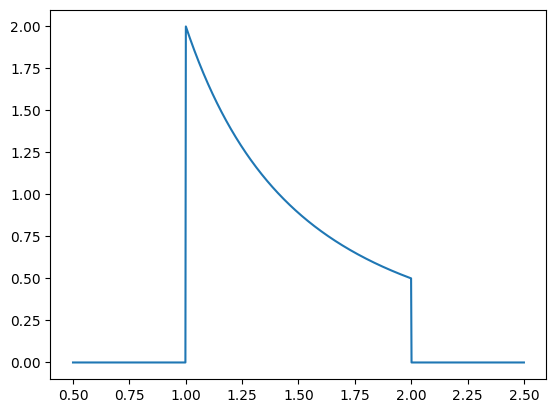

In [32]:
x = np.linspace(0.5, 2.5, 1_000)
y = [f(val) for val in x]
plt.plot(x, y)
plt.show()

Функция распределения:

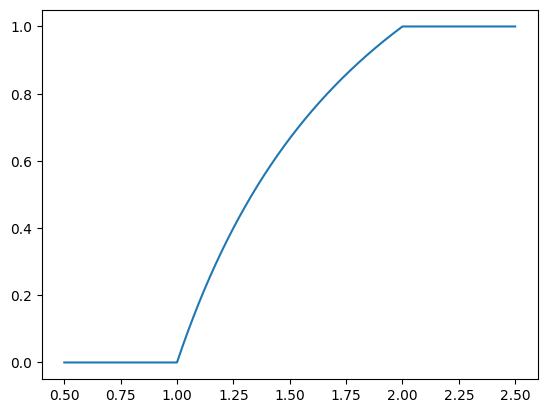

In [33]:
x = np.linspace(0.5, 2.5, 1_000)
y = [F(val) for val in x]
plt.plot(x, y)
plt.show()

$F^{-1}(u)$:</br></br>
На интервале x $\in [1,2)$ y $\in \Big[0, 1\Big)$<br/>
На y $\in \Big[0, 1\Big)$ решим y =$-\dfrac 2 x + 2$ относительно x:</br></br>
x = -$\dfrac 2 {y - 2}$</br></br>
Обратная функция:</br></br>
$F^{-1}(u) = -\dfrac 2 {y - 2} при y \in [0, 1)$

In [9]:
def inversion(y):
    if (y >= 0 and y < 1):
        return -(2 / (y - 2))

График обратной функции:

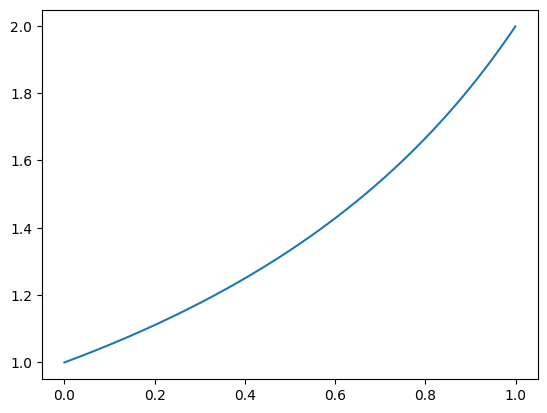

In [20]:
x = np.linspace(0, 1, 1000)
y = [inversion(val) for val in x]
plt.plot(x, y)
plt.show()

$\displaystyle MX = \int^2_{1} xf(x)dx = \int^2_{1} \frac 2 {x} dx = 2\ln 2 = 1.386\qquad$</br></br>
$\displaystyle DX = MX^2 - (MX)^2 = \int^2_{1} 2dx - (2\ln 2)^2 = 2 - 4(\ln 2)^2 = 0.078$</br></br>
Выборка равномерно распределённой случайной величины:

In [22]:
selection= stats.uniform.rvs(size=n, random_state=SEED)

Построим выборку по полученной обратной функции:

In [26]:
x = np.array([inversion(val) for val in selection])
print(f"Первые несколько значений из выборки:\n{re.sub(" +", ", ", str(x[:6])[1:-1])}...")
print(f"Размерность выборки: {str(x.shape)[1:-2]}")

Первые несколько значений из выборки:
1.37818261, 1.55664963, 1.43139678, 1.3744601, 1.26875763, 1.47698937...
Размерность выборки: 250


### 2.1 Построить гистограмму распределения и изобразить её графически</br> одновременно с теоретичесой плотностью вероятностей

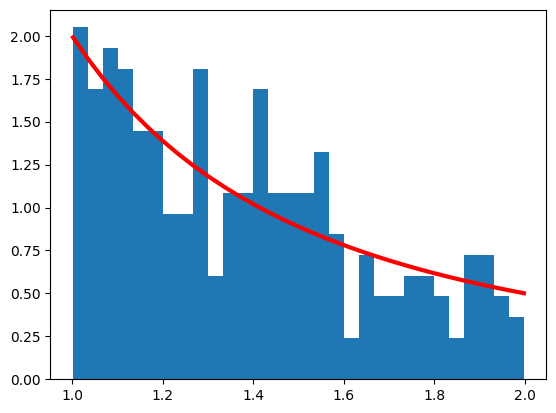

In [29]:
_, intervals_x, _ = plt.hist(x, 30, density=True)
theoretic_y = [f(val) for val in intervals_x]

plt.plot(intervals_x, theoretic_y, linewidth=3, color='r')
plt.show()

### 2.2 Определить точечные оценки математического ожидания и дисперсии</br>
$\displaystyle \bar{X} = \frac 1n \sum^n_{i=1} x_i$ - оценка мат. ожидания, выборочное среднее</br></br>
$\displaystyle S^2 = \frac 1n \sum^n_{i=1} (x_i - \bar{X})^2$ - оценка дисперсии, выборочная дисперсия</br></br>
$\displaystyle M^*_4 = \frac 1n \sum^n_{i=1} (x_i - \bar{X})^4$ - выборочный центральный момент 4-го порядка, $M^*_4$

In [31]:
average = x.sum() / n
sumT = 0

for i in range(n):
    sumT += (x[i] - average) ** 2

variance = sumT / n

sum_tmp = 0

for i in range(n):
    sum_tmp += (x[i] - average) ** 4

variance_4 = sum_tmp / n

print(f"Выборочное среднее: {average}\n" + f"Выборочная дисперсия: {variance}\n" + f"выборочный центральный момент 4-го порядка: {variance_4}")

Выборочное среднее: 1.37664580773482
Выборочная дисперсия: 0.07355871927191451
выборочный центральный момент 4-го порядка: 0.012275015613821012


### 2.3 При заданном виде распределения </br>построить оценки входящих в него неизвестных параметров методом моментов.

$\displaystyle MX = \int^2_{1} xf(x)dx = \int^2_{1} x\dfrac{a}{x^2} dx = a \ln 2$</br></br>
$\displaystyle DX = MX^2 - (MX)^2 = \int^2_{1} x^2 \frac a {x^2} dx - a^2(\ln 2)^2 = a - a^2(\ln 2)^2$</br></br>
Приравниваем DX и $S^2$, MX и $\bar{X}$</br></br>
$\displaystyle \begin{cases} a - {a^2} (\ln 2)^2 = 0.0736 \\\\ a \ln 2 = 1.3766 \end{cases}$</br></br>
a = 1.97

### 2.4 Построить доверительные интервалы для математичкского ожидания и дисперсии,</br> соответствующие доверительной вероятности $\gamma$

Доверительный интервал для MX при неизвестном DX, для закона распределения отличного от нормального:</br></br>
$\displaystyle \Delta_{\gamma}(a) = \Big( \bar{X} - c_{(1+\gamma)/2} \frac S{\sqrt n}; \quad \bar{X} + c_{(1+\gamma)/2} \frac S{\sqrt n} \Big)$</br>
где $c_{(1+\gamma)/2}$ - такое значение функции Лапласа $Ф(x)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{x}e^{-u^2/2}du$, при котором $Ф(c_{(1+\gamma)/2})=(1+\gamma)/2$<br/></br>
Доверительный интервал для DX при неизвестной MX, для закона распределения отличного от нормального:</br></br>
$\displaystyle \Delta_{\gamma}(\sigma^2) = \Big( S^2 - c_{(1+\gamma)/2} \frac{\sqrt{M^*_4-S^4}}{\sqrt n}; \quad S^2 + c_{(1+\gamma)/2} \frac{\sqrt{M^*_4-S^4}}{\sqrt n} \Big)$</br>
где $M^*_4$ - выборочный центральный момент 4-го порядка (см. 2.2)
### Интервальная оценка MX:</br>
$\gamma$ = 0.98</br></br>
$Ф(c_{(1+\gamma)/2})=(1+\gamma)/2$</br></br>
$Ф(c_{(1+\gamma)/2})=0,99$</br></br>
Тогда $c_{(1+\gamma)/2}=2,326$

In [32]:
MX = (average - 1.96 * (np.sqrt(variance) / np.sqrt(n)), average + 1.96 * (np.sqrt(variance) / np.sqrt(n)))
print(f"Интервальная оценка MX при неизвестном DX: {MX}")

Интервальная оценка MX при неизвестном DX: (1.3430253868002162, 1.4102662286694239)


### Интервальная оценка DX:

In [33]:
DX = (variance - 1.96 * (np.sqrt(variance_4 - variance**2) / np.sqrt(n)), variance + 1.96 * (np.sqrt(variance_4 - variance**2) / np.sqrt(n)))
print(f"Интервальная оценка DX при неизвестной MX: {DX}")

Интервальная оценка DX при неизвестной MX: (0.06328852093478082, 0.0838289176090482)


### 2.5 Проверить гипотезу о виде распределения случайной величины Y, </br>используя критерий $\chi^2$ Пирсона при уровне значимости $\alpha$

In [34]:
sequence = x.copy()
sequence.sort()
print(f"Вариационный ряд: {re.sub(" +", ", ", str(sequence[:6])[1:-1])}...")

Вариационный ряд: 1.00235326, 1.00589155, 1.00934746, 1.009484, 1.00968959, 1.01015588...


In [35]:
print(f"Минимальное значение в ряду: {min(sequence)}")
print(f"Максимальное значение в ряду: {max(sequence)}")

Минимальное значение в ряду: 1.0023532629413314
Максимальное значение в ряду: 1.997696668861408


Количество интервалов, $N = [1+3.32 \lg n] + 1 = 9$

In [36]:
N = 9

$h=\frac{x_{max}-x_{min}}{N}$

In [37]:
h = (max(sequence) - min(sequence)) / N
print(f"Длина интервала: {h}")

Длина интервала: 0.11059371176889739


In [38]:
intervals = [[min(sequence) + k * h, min(sequence) + (k + 1) * h] for k in range(N)]

for (i, interval) in enumerate(intervals):
    print(f"Интервал {i + 1}: {str(interval)[:-1]})")

Интервал 1: [1.0023532629413314, 1.1129469747102287)
Интервал 2: [1.1129469747102287, 1.2235406864791263)
Интервал 3: [1.2235406864791263, 1.3341343982480236)
Интервал 4: [1.3341343982480236, 1.444728110016921)
Интервал 5: [1.444728110016921, 1.5553218217858182)
Интервал 6: [1.5553218217858182, 1.6659155335547158)
Интервал 7: [1.6659155335547158, 1.776509245323613)
Интервал 8: [1.776509245323613, 1.8871029570925106)
Интервал 9: [1.8871029570925106, 1.997696668861408)


Заносим значения в соответствующие интервалы:

In [40]:
filled_int = [[] for _ in range(len(intervals))]

for value in sequence:
    for i in range(len(intervals)):
        if (intervals[i][0] <= value < intervals[i][1]):
            filled_int[i].append(value)
filled_int[-1].append(max(sequence))

In [42]:
frequencies = []

for interval in filled_int:
    frequencies.append(len(interval))

rel = [frequency / n for frequency in frequencies]

print(f"Частоты попадания: {frequencies}")
print(f"Сумма частот: {sum(frequencies)}", end="\n\n")

print(f"Относительные частоты: {np.round(rel, 2)}")
print(f"Сумма относительных частот: {sum(rel)}")

Частоты попадания: [51, 39, 32, 36, 29, 20, 16, 11, 16]
Сумма частот: 250

Относительные частоты: [0.2  0.16 0.13 0.14 0.12 0.08 0.06 0.04 0.06]
Сумма относительных частот: 1.0


Критерий Пирсона:</br></br>
$\displaystyle \chi^2_n=\sum^N_{k=1}\frac{(\nu_k-n p_k)^2}{n p_k}$</br></br>
$p_k = F(u_k)-F(u_{k-1})$</br></br>
$F(x, a)=\int_{-\infty}^{x}f(t, a)dt$</br></br>
$\displaystyle f(x, a)=\begin{cases} \dfrac{x}{a^2} & \text{, } \dfrac a 2 \le |x| \le a \\0 & \text{, } x < \dfrac a 2, x >a \end{cases}$</br></br>
Функция F(x, a) найдена в пункте 2.1, берём точечную оценку параметра a из пункта 2.3

In [45]:
p = [F(val[-1], a = 1.97) - F(val[0], a = 1.97) for val in intervals]

for (k, pk) in enumerate(p):
    print(f"p{k + 1} = {pk}")

p1 = 0.19529961115422712
p2 = 0.15999402770571702
p3 = 0.13346846415219904
p4 = 0.1130344838726669
p5 = 0.09695947874606725
p6 = 0.08408594652943169
p7 = 0.07361667713635622
p8 = 0.06498806305676652
p9 = 0.07392820359690933


In [46]:
chi = 0
for k in range(N):
    chi += (frequencies[k] - n * p[k])**2 / n * p[k]
print(f"Критерий Пирсона: {chi}")

Критерий Пирсона: 0.05224740772983138


$\alpha$ = 0.1</br></br>
Порог для $\chi^2_{1-\alpha;N-1}$:</br></br>
$1-\alpha=1-0.1=p=0.9$</br></br>
$N-1-r=7 \text{( r = 1 - число неизвестных параметров)}$</br></br>
$\chi^2_{1-\alpha;N-1-r}=12,017$<br/></br>
Так как: $\chi^2 < \chi^2_{1-\alpha;N-1-r} \Leftrightarrow 0.052 < 12,017 \Rightarrow \text{Гипотеза принимается}$